Notebook by Simona Valente

### Makeup API - How to extract data through an API call

In this exercise we will use the [Makeup API](https://makeup-api.herokuapp.com/) from the [website](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) to retrieve and analyse the [data related to the Maybelline brand](https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline).

In [1]:
#import libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

#### Call API

1. Save the sample URL / endpoint as a string to an object called `url` and join it the `get()` function from the `requests` library, make an HTTP request and save it to a new object named `mkp`.

In [2]:
url = 'https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline'
mkp = requests.get(url)

2. Check that the status of the request from the previous point was successful *(hint: 200 = OK)*.

In [3]:
mkp.status_code

200

3. Using the `.json()` method, check the contents of the data you retrieved via the API call. Then, using the `pd.DataFrame.from_dict()` function, save its contents to a DataFrame named `mkp_df`.

In [4]:
type(mkp.json())

list

In [5]:
#To analyze the content of the HTTP response I take the element with index 1
mkp.json()[1]

{'id': 488,
 'brand': 'maybelline',
 'name': 'Maybelline Fit Me Bronzer',
 'price': '10.29',
 'price_sign': None,
 'currency': None,
 'image_link': 'https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d82b4858c622bb3c1cef07b9d850_ra,w158,h184_pa,w158,h184.png',
 'product_link': 'https://well.ca/products/maybelline-fit-me-bronzer_31265.html',
 'website_link': 'https://well.ca',
 'description': "Why You'll Love It\n\nLightweight pigments blend easily and wear evenly\nProvides a natural, fade-proof bronzed color that leaves skin the way it was meant to be...fresh, breathing and natural\n\nFor Best Results: For soft, natural look, brush along cheekbone, sweeping upward.",
 'rating': 4.5,
 'category': None,
 'product_type': 'bronzer',
 'tag_list': [],
 'created_at': '2016-10-01T18:36:05.584Z',
 'updated_at': '2017-12-23T21:08:49.985Z',
 'product_api_url': 'https://makeup-api.herokuapp.com/api/v1/products/488.json',
 'api_featured_image': '//s3.amazonaws.com/donovanbailey/products/api_featured_image

#### Create a Dataframe from an `.json()` object.

In [6]:
mkp_json = mkp.json()
mkp_df = pd.DataFrame.from_dict(mkp_json)
mkp_df.head()

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,495,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/991799...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,None,bronzer,[],2016-10-01T18:36:15.012Z,2017-12-23T21:08:50.624Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
1,488,maybelline,Maybelline Fit Me Bronzer,10.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d8...,https://well.ca/products/maybelline-fit-me-bro...,https://well.ca,Why You'll Love It\n\nLightweight pigments ble...,4.5,None,bronzer,[],2016-10-01T18:36:05.584Z,2017-12-23T21:08:49.985Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CF9978', 'colour_name': 'Medi..."
2,477,maybelline,Maybelline Facestudio Master Contour Kit,15.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/4f731d...,https://well.ca/products/maybelline-facestudio...,https://well.ca,Maybelline Facestudio Master Contour Kit is th...,NaN,None,bronzer,[],2016-10-01T18:35:40.504Z,2017-12-23T21:08:48.157Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#9B7163', 'colour_name': None}..."
3,468,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/462103...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,NaN,powder,blush,[],2016-10-01T18:35:27.706Z,2017-12-23T21:08:47.102Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
4,452,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/e8c59b...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,powder,blush,[],2016-10-01T18:35:07.476Z,2017-12-23T20:51:17.460Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]


#### Data Analysis

4. Check the shape of new dataframe and the data type of all columns in the DataFrame. The `price` variable is stored as a string, but it should be a numeric variable. Convert it to numeric.. 

In [7]:
mkp_df.shape

(54, 19)

In [8]:
mkp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54 non-null     int64  
 1   brand               54 non-null     object 
 2   name                54 non-null     object 
 3   price               54 non-null     object 
 4   price_sign          0 non-null      object 
 5   currency            0 non-null      object 
 6   image_link          54 non-null     object 
 7   product_link        54 non-null     object 
 8   website_link        54 non-null     object 
 9   description         54 non-null     object 
 10  rating              46 non-null     float64
 11  category            31 non-null     object 
 12  product_type        54 non-null     object 
 13  tag_list            54 non-null     object 
 14  created_at          54 non-null     object 
 15  updated_at          54 non-null     object 
 16  product_ap

In [9]:
mkp_df['price'] = pd.to_numeric(mkp_df['price'])

5. What is the the most expensive product? 

In [10]:
moreexp_product = mkp_df[mkp_df['price']==mkp_df['price'].max()]
table_moreexp_product = moreexp_product[['name','price']]
table_moreexp_product

,name,price
12,Maybelline Dream Velvet Foundation,18.49


6. Create a table with the products with the highest rating.

In [11]:
rating_max = mkp_df['rating'].max()
best_product = mkp_df[mkp_df['rating']==rating_max]
table_best_product = best_product[['name','rating','category']]
table_best_product

,name,rating,category
0,Maybelline Face Studio Master Hi-Light Light B...,5.0,None
4,Maybelline Face Studio Master Hi-Light Light B...,5.0,powder
40,Maybelline Color Sensational Vivids Lipcolour,5.0,lipstick
41,Maybelline Color Sensational Creamy Mattes Lip...,5.0,lipstick


7. Create a new DataFrame named `mkp_df_group` where you group all the `product_type`s and show their average price and rating. Sort them by rating.

In [12]:
mkp_df_group = mkp_df.groupby('product_type', as_index=False)[['price', 'rating']].mean().sort_values('rating',ascending=False)
mkp_df_group

,product_type,price,rating
0,blush,13.065000,4.766667
1,bronzer,13.756667,4.750000
6,lipstick,10.704286,4.400000
2,eyeliner,9.940000,4.233333
7,mascara,9.817273,4.160000
4,foundation,14.080000,3.877778
3,eyeshadow,11.847143,3.757143
5,lip_liner,8.290000,3.500000
8,nail_polish,4.490000,3.433333


8. Create a scatterplot where you show the relationship between the `price` (on the x-axis) and the `rating` (on the y-axis) variables. 

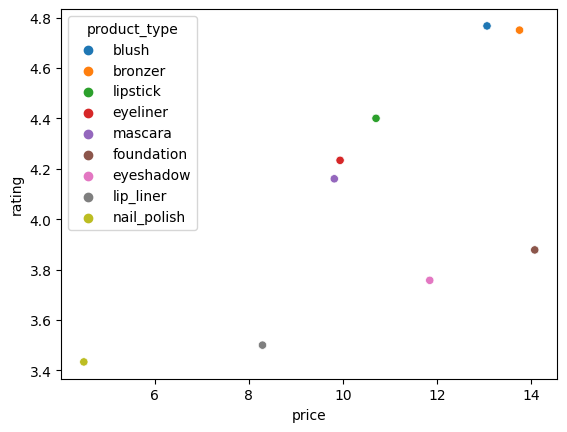

In [13]:
sns.scatterplot(x='price', y='rating', data=mkp_df_group, hue = 'product_type')
plt.show()

9. If you were to speak to the product department, which of these products would you recommend them to focus on in order to improve the overall customer satisfaction, considering their value for money?

I would encourage them to understand why the customers are not so happy about the eyeshadow and the foundation products, since they seem to be quite expensive products (a proxy for higher quality) but are receiving (relatively) low ratings (compared to other similarly priced products). 

10. How is our product portfolio distributed?

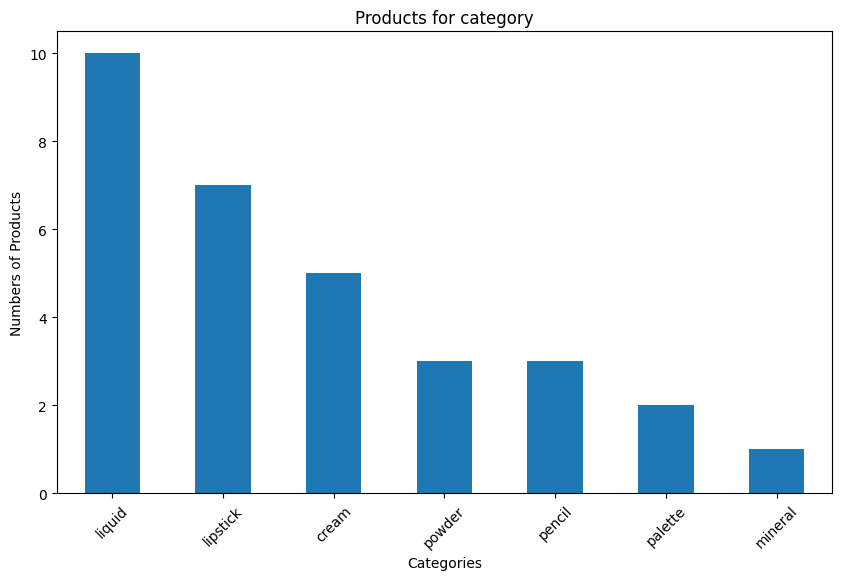

In [14]:
#I need this step to transform category into a numeric variable
count_for_category = mkp_df['category'].value_counts()

plt.figure(figsize=(10, 6))
count_for_category.plot(kind='bar')
plt.title('Products for category')
plt.xlabel('Categories')
plt.ylabel('Numbers of Products')
plt.xticks(rotation=45)
plt.show()